In [58]:
path = 'bank-additional-full.csv'
path1 = 'bank-additional.csv'

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,auc,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import scipy.stats as sp
import warnings
warnings.filterwarnings("ignore")

In [60]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [61]:
data = pd.read_csv(path,sep=';')
data1 = pd.read_csv(path1,sep=';')
data.head()
data['cons.conf.idx']=data['cons.conf.idx']**2
data.head()
# data[data.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,1324.96,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,1324.96,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,1324.96,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,1324.96,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,1324.96,4.857,5191.0,no


In [62]:
X_test = data1.iloc[:,:-1]
y_test = data1.iloc[:,-1]
X_train,X_validation = model_selection.train_test_split(data,test_size=0.2,random_state=0)
X_train = X_train[X_train['age']<62] 


X_train1 = X_train.iloc[:,:-1]
y_train = X_train.iloc[:,-1]
X_validation1 = X_validation.iloc[:,:-1]
y_validation = X_validation.iloc[:,-1]

X_train = X_train1
X_validation = X_validation1

y_train[y_train == 'no']=0
y_validation[y_validation == 'no']=0
y_test[y_test == 'no']=0

y_train[y_train=='yes']=1
y_validation[y_validation=='yes']=1
y_test[y_test=='yes']=1

y_train=y_train.astype('int')
y_validation=y_validation.astype('int')
y_test=y_test.astype('int')

# Dealing with Missing values

In [63]:
#imputing education 
edu = X_train['education'].copy()
edu[edu!="unknown"]='known'

In [64]:
freqtab = pd.crosstab(edu,y_train)
print freqtab

y              0     1
education             
known      27712  3260
unknown     1143   157


In [65]:

chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
print("ChiSquare test statistic: ",chi2)
print("p-value: ",pval)

('ChiSquare test statistic: ', 3.0096965248450922)
('p-value: ', 0.082767785682790168)


# Method 1 to deal with missing values

the p-value of the result is less
than 0.01. In this case, the unknown status is obviously related to our target response and
we cannot simply ignore those missing values. Therefore, we use the rest known data to
impute the missing terms

In [66]:
X_train['education'][X_train['education']=="unknown"]=X_train['education'].mode()[0]

In [67]:
#imputing default
default = X_train['default'].copy()
default[default!="unknown"]='known'
freqtab5 = pd.crosstab(default,y_train)
print freqtab5
chi2,pval,dof,expected = sp.chi2_contingency(freqtab5)
print("p-value: ",pval)

y            0     1
default             
known    22405  3089
unknown   6450   328
('p-value: ', 6.1089870802688172e-67)


# Method 2 to deal with missing values
the p-value of the result is very less than 0.01.the unknown status is obviously related to our target response 
In this case, we cannot make imputation because of the rare population of “yes” response. Therefore, we decided to keep the “unknown” status as a new category and use it in our algorithm.

In [68]:
#imputing loan
loan = X_train['loan'].copy()
loan[loan!="unknown"]='known'
freqtab1 = pd.crosstab(loan,y_train)
print freqtab1
chi2,pval,dof,expected = sp.chi2_contingency(freqtab1)
print("ChiSquare test statistic: ",chi2)
print("p-value: ",pval)

y            0     1
loan                
known    28162  3345
unknown    693    72
('ChiSquare test statistic: ', 1.0216342656310122)
('p-value: ', 0.31213167018492533)


In [69]:
#imputing housing
housing = X_train['housing'].copy()
housing[housing!="unknown"]='known'
freqtab2 = pd.crosstab(housing,y_train)
print freqtab2
chi2,pval,dof,expected = sp.chi2_contingency(freqtab2)
print("p-value: ",pval)

y            0     1
housing             
known    28162  3345
unknown    693    72
('p-value: ', 0.31213167018492533)


In [70]:
#imputing marital
marital = X_train['marital'].copy()
marital[marital!="unknown"]='known'
freqtab3 = pd.crosstab(marital,y_train)
print freqtab3
chi2,pval,dof,expected = sp.chi2_contingency(freqtab3)
print("p-value: ",pval)

y            0     1
marital             
known    28802  3408
unknown     53     9
('p-value: ', 0.42393832724735481)


In [71]:
#imputing job
job = X_train['job'].copy()
job[job!="unknown"]='known'
freqtab4 = pd.crosstab(job,y_train)
print freqtab4
chi2,pval,dof,expected = sp.chi2_contingency(freqtab4)
print("p-value: ",pval)

y            0     1
job                 
known    28626  3396
unknown    229    21
('p-value: ', 0.30506073790198113)


# Method 3 to deal with missing values
Except education and default all other p values are very high than 0.05 
thus do not show a strong relationship between the
known/unknown status and target response, 
so for all other categorical variables we impute mode which will not
affect our model due to weak relationship

In [72]:
X_train['housing'][X_train['housing']=="unknown"]=X_train['housing'].mode()[0]
X_train['loan'][X_train['loan']=="unknown"]=X_train['loan'].mode()[0]
X_train['marital'][X_train['marital']=="unknown"]=X_train['marital'].mode()[0]
X_train['job'][X_train['job']=="unknown"]=X_train['job'].mode()[0]

In [73]:
#Imputing same values in validation
X_validation['marital'][X_validation['marital']=="unknown"]=X_train['marital'].mode()[0]
X_validation['job'][X_validation['job']=="unknown"]=X_train['job'].mode()[0]
X_validation['education'][X_validation['education']=="unknown"]=X_train['education'].mode()[0]
X_validation['housing'][X_validation['housing']=="unknown"]=X_train['housing'].mode()[0]
X_validation['loan'][X_validation['loan']=="unknown"]=X_train['loan'].mode()[0]

In [74]:
#Imputing same values in test
X_test['marital'][X_test['marital']=="unknown"]=X_train['marital'].mode()[0]
X_test['job'][X_test['job']=="unknown"]=X_train['job'].mode()[0]
X_test['education'][X_test['education']=="unknown"]=X_train['education'].mode()[0]
X_test['housing'][X_test['housing']=="unknown"]=X_train['housing'].mode()[0]
X_test['loan'][X_test['loan']=="unknown"]=X_train['loan'].mode()[0]

# Feature Engineering

In [75]:
X_train.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed'],
      dtype='object')

In [76]:
#education
def encode_edu(data):
    data['education'][data['education']=='illiterate']=7
    data['education'][data['education']=='basic.4y']=1
    data['education'][data['education']=='basic.6y']=2
    data['education'][data['education']=='basic.9y']=3
    data['education'][data['education']=='high.school']=4
    data['education'][data['education']=='university.degree']=5
    data['education'][data['education']=='professional.course']=6
    data['education']=data['education'].astype('int')
    return data

In [77]:
X_train = encode_edu(X_train)
X_validation = encode_edu(X_validation)
X_test = encode_edu(X_test)

In [78]:
def cat_variables(df):
    numeric_list = list(df._get_numeric_data().columns)
    non_numeric = np.setdiff1d(df.columns.values, numeric_list)
    return non_numeric
def num_variables(df):
    return list(df._get_numeric_data().columns)
cat = cat_variables(X_train)
num = num_variables(X_train)
print cat

['contact' 'day_of_week' 'default' 'housing' 'job' 'loan' 'marital' 'month'
 'poutcome']


In [79]:
for val in cat:
    print val
    print X_train[val].value_counts()

contact
cellular     20332
telephone    11940
Name: contact, dtype: int64
day_of_week
thu    6758
mon    6685
wed    6440
tue    6266
fri    6123
Name: day_of_week, dtype: int64
default
no         25492
unknown     6778
yes            2
Name: default, dtype: int64
housing
yes    17657
no     14615
Name: housing, dtype: int64
job
admin.           8595
blue-collar      7371
technician       5396
services         3177
management       2280
entrepreneur     1156
self-employed    1132
retired           844
housemaid         822
unemployed        800
student           699
Name: job, dtype: int64
loan
no     27398
yes     4874
Name: loan, dtype: int64
marital
married     19455
single       9266
divorced     3551
Name: marital, dtype: int64
month
may    10914
jul     5762
aug     4806
jun     4229
nov     3208
apr     1995
oct      477
sep      388
mar      380
dec      113
Name: month, dtype: int64
poutcome
nonexistent    28098
failure         3205
success          969
Name: poutcome, dtype: 

In [80]:
def encodedef(data):
    data['default'][data['default']=='yes']=3
    data['default'][data['default']=='no']=1
    data['default'][data['default']=='unknown']=2
    data['default']=data['default'].astype('int')
    return data

In [81]:
X_train = encodedef(X_train)
X_validation = encodedef(X_validation)
X_test = encodedef(X_test)

In [82]:
def encodehous(data):
    data['housing'][data['housing']=='yes']=2
    data['housing'][data['housing']=='no']=1
    data['housing']=data['housing'].astype('int')
    return data

In [83]:
X_train = encodehous(X_train)
X_validation = encodehous(X_validation)
X_test = encodehous(X_test)

In [84]:
def encodeloan(data):
    data['loan'][data['loan']=='yes']=2
    data['loan'][data['loan']=='no']=1
    data['loan']=data['loan'].astype('int')    
    return data

In [85]:
X_train = encodeloan(X_train)
X_validation = encodeloan(X_validation)
X_test = encodeloan(X_test)

In [86]:
def encodecontact(data):
    data['contact'][data['contact']=='cellular']=2
    data['contact'][data['contact']=='telephone']=1
    data['contact']=data['contact'].astype('int')
    return data

In [87]:
X_train = encodecontact(X_train)
X_validation = encodecontact(X_validation)
X_test = encodecontact(X_test)

In [88]:
# day_of_week
def encodeday(data):
    data['day_of_week'][data['day_of_week']=='mon']=5
    data['day_of_week'][data['day_of_week']=='tue']=1
    data['day_of_week'][data['day_of_week']=='wed']=2
    data['day_of_week'][data['day_of_week']=='thu']=3
    data['day_of_week'][data['day_of_week']=='fri']=4
    data['day_of_week']=data['day_of_week'].astype('int')
    return data

In [89]:
X_train = encodeday(X_train)
X_validation = encodeday(X_validation)
X_test = encodeday(X_test)

In [90]:
def encodemarital(data):
    data['marital'][data['marital']=='single']=3
    data['marital'][data['marital']=='married']=1
    data['marital'][data['marital']=='divorced']=2
    data['marital']=data['marital'].astype('int')
    return data

In [91]:
X_train = encodemarital(X_train)
X_validation = encodemarital(X_validation)
X_test = encodemarital(X_test)

In [92]:
# poutcome
# nonexistent    28481
# failure         3369
# success         1100
def encodepoutcome(data):
    data['poutcome'][data['poutcome']=='nonexistent']=3
    data['poutcome'][data['poutcome']=='failure']=1
    data['poutcome'][data['poutcome']=='success']=2
    data['poutcome']=data['poutcome'].astype('int')
    return data
X_train = encodepoutcome(X_train)
X_validation = encodepoutcome(X_validation)
X_test = encodepoutcome(X_test)

In [93]:
def encodemonth(data):
    data['month'][data['month']=='jan']=1
    data['month'][data['month']=='feb']=2
    data['month'][data['month']=='mar']=3
    data['month'][data['month']=='apr']=4
    data['month'][data['month']=='may']=5
    data['month'][data['month']=='jun']=6
    data['month'][data['month']=='jul']=7
    data['month'][data['month']=='aug']=8
    data['month'][data['month']=='sep']=9
    data['month'][data['month']=='oct']=10
    data['month'][data['month']=='nov']=11
    data['month'][data['month']=='dec']=12
    data['month']=data['month'].astype('int')
    return data
X_train = encodemonth(X_train)
X_validation = encodemonth(X_validation)
X_test = encodemonth(X_test)

In [94]:
# ob
# admin.           8636
# blue-collar      7381
# technician       5419
# services         3177
# management       2297
# retired          1368
# entrepreneur     1162
# self-employed    1137
# housemaid         870
# unemployed        804
# student           699
def encodejob(data):
    data['job'][data['job']=='admin.']=1
    data['job'][data['job']=='blue-collar']=2
    data['job'][data['job']=='technician']=3
    data['job'][data['job']=='services']=4
    data['job'][data['job']=='management']=5
    data['job'][data['job']=='retired']=6
    data['job'][data['job']=='entrepreneur']=7
    data['job'][data['job']=='self-employed']=8
    data['job'][data['job']=='housemaid']=9
    data['job'][data['job']=='unemployed']=10
    data['job'][data['job']=='student']=11
    data['job']=data['job'].astype('int')
    return data
X_train = encodejob(X_train)
X_validation = encodejob(X_validation)
X_test = encodejob(X_test)

# Dealing with outliers


In [95]:
# X_train.corr()
X_train.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000,32272.000000
mean,39.302336,3.375434,0.822912,4.049300,1.209965,0.452869,0.848971,0.369980,6.592464,1.980416,257.207053,2.575483,966.017105,0.161316,0.159364,0.134531,93.586638,1667.826341,3.678972,5169.867030
std,9.408151,2.595630,0.604819,1.439865,0.407442,0.497781,0.358082,0.482806,2.017586,1.410941,259.548926,2.769765,177.942147,0.474316,0.440483,1.542662,0.569637,361.797655,1.706904,70.153138
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,723.610000,0.634000,4963.600000
25%,32.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,1324.960000,1.365000,5099.100000
50%,38.000000,3.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,6.000000,2.000000,178.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.876000,1747.240000,4.857000,5191.000000
75%,46.000000,4.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000,318.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,1823.290000,4.961000,5228.100000
max,61.000000,11.000000,2.000000,6.000000,2.000000,1.000000,1.000000,1.000000,12.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,2580.640000,5.045000,5228.100000


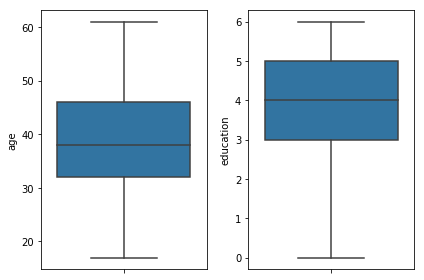

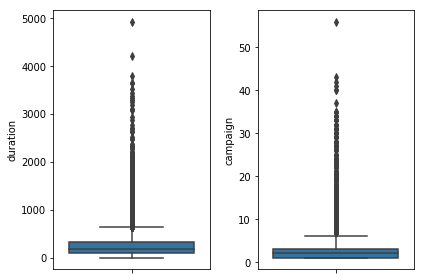

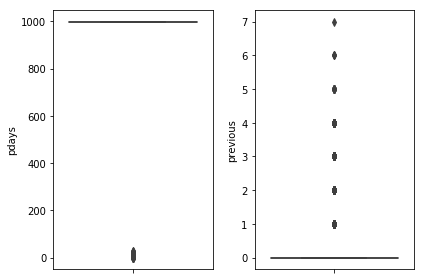

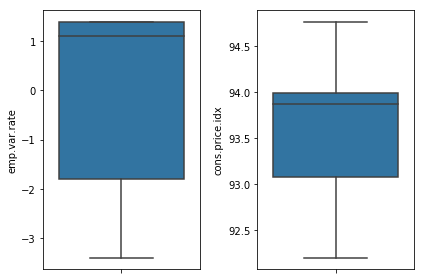

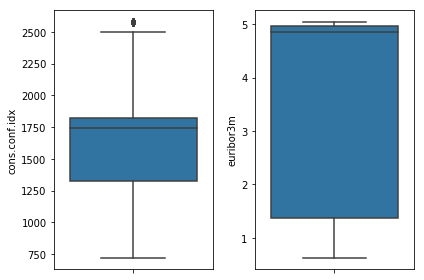

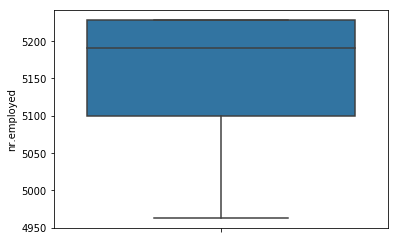

In [96]:
for i in range(0,len(num),2):
	if len(num)>i+1:
		plt.subplot(121)
		sns.boxplot(None, num[i],data = X_train)
		plt.subplot(122)
		sns.boxplot(None, num[i+1],data = X_train)
		plt.tight_layout()
	else:
		sns.boxplot(None, num[i],data = X_train)
	plt.show()

In [97]:
Q1,Q3 = X_train.age.quantile([0.25,0.75])
Q1,Q3
IQR = Q3-Q1
IQR

14.0

In [98]:
IQR = Q3-Q1
IQR

14.0

In [99]:
# X_train['age'][X_train['age']<min] = mean
# X_train['age'][X_train['age']>max] = mean
# X_validation['age'][X_validation['age']<min] = mean
# X_validation['age'][X_validation['age']>max] = mean
# X_test['age'][X_test['age']<min] = mean
# X_test['age'][X_test['age']>max] = mean

In [100]:
Q1,Q3 = X_train.campaign.quantile([0.25,0.75])
Q1,Q3
IQR = Q3-Q1
IQR
median = X_train.campaign.median()
mean = X_train.campaign.mean()
min = round(mean - (1.5*IQR))
max = round(mean + (1.5*IQR))
min,max,mean,median
# # X_train['campaign'][X_train['campaign']<min] = mean
X_train['campaign'][X_train['campaign']>max] = mean

In [101]:
Q1,Q3 = X_train.previous.quantile([0.25,0.75])
Q1,Q3
IQR = Q3-Q1
IQR
median = X_train.previous.median()
mean = X_train.previous.mean()
min = round(mean - (1.5*IQR))
max = round(mean + (1.5*IQR))
min,max,mean,median
# X_train['campaign'][X_train['campaign']<min] = mean
# X_train['previous'][X_train['previous']>max] = mean

(0.0, 0.0, 0.16131631135349528, 0.0)

In [102]:
Q1,Q3 = X_train['cons.conf.idx'].quantile([0.25,0.75])
Q1,Q3
IQR = Q3-Q1
IQR
median = X_train['cons.conf.idx'].median()
mean = X_train['cons.conf.idx'].mean()
min = round(mean - (1.5*IQR))
max = round(mean + (1.5*IQR))
min,max,mean,median
X_train['cons.conf.idx'][X_train['cons.conf.idx']<min] = mean
X_train['cons.conf.idx'][X_train['cons.conf.idx']>max] = mean

# Feature selection

In [103]:
def algo_performace(y_test,y_pred):   
    print "Confusion Matrix :"
    print confusion_matrix(y_test,y_pred)
    print "\nF1 Score :"
    print f1_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    print "\nArea Under Curve : "
    print auc(fpr,tpr)
    print "\nprecision score : "
    print precision_score(y_test, y_pred)
    print "\nrecall score : "
    print recall_score(y_test, y_pred)
    print "\nROC : "
    plt.plot(fpr,tpr)
    plt.show()
    return tpr,fpr

In [104]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29321,40,4,2,4,1,0,1,1,4,4,501,3.0,999,0,0,-1.8,93.075,2218.410000,1.405,5099.1
23925,33,10,1,5,1,0,1,0,8,4,59,2.0,999,0,0,1.4,93.444,1303.210000,4.963,5228.1
39148,31,1,2,6,1,0,1,0,3,1,292,2.0,999,1,1,-1.8,93.369,1211.040000,0.655,5008.7
12078,29,2,0,3,1,0,1,1,6,4,76,1.0,999,0,0,1.4,94.465,1747.240000,4.947,5228.1
41021,29,10,0,4,1,0,1,0,10,4,168,2.0,999,0,0,-1.1,94.601,1667.826341,1.029,4963.6


In [105]:
X_train=X_train.drop('duration',axis=1)
X_validation=X_validation.drop('duration',axis=1)
X_test=X_test.drop('duration',axis=1)

Feature importances for decision tree classifier = ['age' 'job' 'marital' 'education' 'loan' 'contact' 'month' 'day_of_week'
 'campaign' 'pdays' 'previous' 'poutcome' 'cons.price.idx' 'euribor3m'
 'nr.employed']
Confusion Matrix :
[[7091  228]
 [ 674  245]]

F1 Score :
0.352011494253

Area Under Curve : 
0.617721163677

precision score : 
0.517970401691

recall score : 
0.266594124048

ROC : 


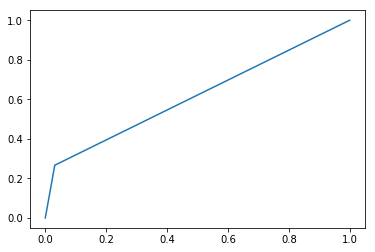

In [106]:
model = RandomForestClassifier(random_state=9,criterion='entropy',max_features=15)
model1 = DecisionTreeClassifier(max_depth=10)
selector = RFE(estimator=model1, n_features_to_select=15)
selector = selector.fit(X_train, y_train)
model.fit(X_train, y_train)

print("Feature importances for decision tree classifier = {}".format(X_validation.columns.values[selector.support_]))
y_pred = model.predict(X_validation)
tpr,fpr = algo_performace(y_validation,y_pred)


In [107]:
print model.feature_importances_
print model.n_outputs_
print model.n_features_

[ 0.18559811  0.08695445  0.04222718  0.07546734  0.01948743  0.03684873
  0.02677339  0.01269871  0.01853238  0.06375946  0.08528343  0.0185212
  0.01307306  0.01432193  0.00468923  0.01410017  0.0142935   0.12729563
  0.14007468]
1
19


In [108]:
X_final = X_train.iloc[:,model.feature_importances_.argsort()[::-1][:10]]
X_validation_final = X_validation.iloc[:,model.feature_importances_.argsort()[::-1][:10]]


In [109]:
X_train1.corr()
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [110]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res,y_res = ros.fit_sample(X_final, y_train)

print Counter(y_res)
X_train = pd.DataFrame(X_res)
y_train = pd.DataFrame(y_res)
X_validation = X_validation_final

Counter({0: 28855, 1: 28855})


Confusion Matrix :
[[5262 2057]
 [ 275  644]]

F1 Score :
0.355801104972

Area Under Curve : 
0.70985618691

precision score : 
0.238430211033

recall score : 
0.700761697497

ROC : 


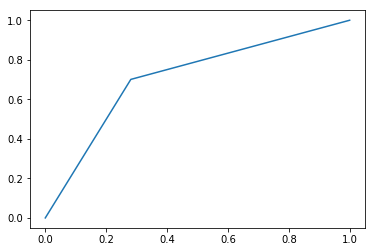

In [111]:
LogR = LogisticRegression(penalty='l2',C=100)
LogR.fit(X=X_train,y=y_train)
y_LogR = LogR.predict(X_validation)
fpr,tpr = algo_performace(y_validation,y_LogR)

In [112]:
X_train[0]=X_train[0].astype('int')
X_train[4]=X_train[4].astype('int')
X_validation['age']=X_validation['age'].astype('int')
X_validation['campaign']=X_validation['campaign'].astype('int')

In [113]:
X_train1 = X_train.copy()

X_train1[0] = pd.cut(X_train1[0], [0, 5, 10,15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 
                               labels=['0', '1', '2', '3', '4', '5', 
                                       '6', '7', '8', '9', '10',
                                      '11', '12', '13', '14', '15',
                                      '16', '17', '18', ''])

In [114]:
X_train1[0]=X_train1[0].astype('int')

In [115]:
X_validation1 = X_validation.copy()

X_validation1['age'] = pd.cut(X_validation1['age'], [0, 5, 10,15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 
                               labels=['0', '1', '2', '3', '4', '5', 
                                       '6', '7', '8', '9', '10',
                                      '11', '12', '13', '14', '15',
                                      '16', '17', '18', '19'])

In [116]:
X_validation1['age']=X_validation1['age'].astype('int')

Confusion Matrix :
[[5261 2058]
 [ 275  644]]

F1 Score :
0.355702844518

Area Under Curve : 
0.709787871566

precision score : 
0.238341968912

recall score : 
0.700761697497

ROC : 


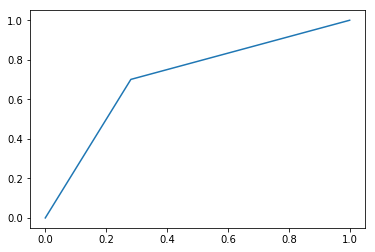

In [117]:
LogR = LogisticRegression(penalty='l2',C=100)
LogR.fit(X=X_train1,y=y_train)
y_LogR = LogR.predict(X_validation1)
fpr,tpr = algo_performace(y_validation,y_LogR)

In [118]:
X_train2 =X_train1.copy()
X_train2[4] = pd.cut(X_train2[4], [0, 8, 16, 24, 80], 
                               labels=['0', '1', '2', '3'])
X_train2

,0,1,2,3,4,5,6,7,8,9
0,7,5099.1,1.405,4.0,0,4.0,4.0,2.0,0.0,1.0
1,6,5228.1,4.963,10.0,0,5.0,4.0,1.0,0.0,1.0
2,6,5008.7,0.655,1.0,0,6.0,1.0,2.0,0.0,1.0
3,5,5228.1,4.947,2.0,0,3.0,4.0,0.0,0.0,1.0
4,5,4963.6,1.029,10.0,0,4.0,4.0,0.0,0.0,1.0
5,4,5228.1,4.961,3.0,0,5.0,0.0,0.0,1.0,1.0
6,7,5191.0,4.857,2.0,0,5.0,0.0,0.0,1.0,1.0
7,9,5099.1,1.405,10.0,0,1.0,4.0,1.0,0.0,1.0
8,6,5228.1,4.968,3.0,0,6.0,1.0,0.0,0.0,1.0
9,7,5191.0,4.857,3.0,0,3.0,4.0,0.0,1.0,0.0


In [119]:
X_validation2 =X_validation1.copy()
X_validation2['campaign'] = pd.cut(X_validation2['campaign'], [0, 8, 16, 24, 80], 
                               labels=['0', '1', '2', '3'])

Confusion Matrix :
[[6521  798]
 [ 595  324]]

F1 Score :
0.317491425772

Area Under Curve : 
0.621762919442

precision score : 
0.288770053476

recall score : 
0.352557127312

ROC : 


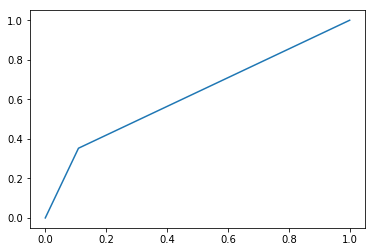

In [120]:
LogR = RandomForestClassifier()
LogR.fit(X=X_train2,y=y_train)
y_LogR = LogR.predict(X_validation2)
fpr,tpr = algo_performace(y_validation,y_LogR)

Confusion Matrix :
[[5262 2057]
 [ 275  644]]

F1 Score :
0.355801104972

Area Under Curve : 
0.70985618691

precision score : 
0.238430211033

recall score : 
0.700761697497

ROC : 


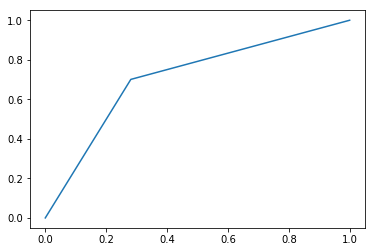

In [121]:
LogR = LogisticRegression(penalty='l2',C=100)
LogR.fit(X=X_train2,y=y_train)
y_LogR = LogR.predict(X_validation2)
fpr,tpr = algo_performace(y_validation,y_LogR)

In [125]:

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train[2].reshape(-1,1))
X_train2[2] = min_max_scaler.fit_transform(X_train2[2].reshape(-1,1))
# X_validation2['euribor3m'] = min_max_scaler.transform(X_validation2['euribor3m'].reshape(-1,1))

In [126]:
X_train3 = X_train2.drop(1,axis=1).copy()
X_validation3 = X_validation2.drop('nr.employed',axis=1).copy()

Confusion Matrix :
[[5262 2057]
 [ 275  644]]

F1 Score :
0.355801104972

Area Under Curve : 
0.70985618691

precision score : 
0.238430211033

recall score : 
0.700761697497

ROC : 


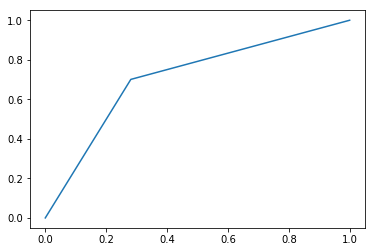

In [140]:
LogR = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogR.fit(X=X_train3,y=y_train)
y_LogR = LogR.predict(X_validation3)
fpr,tpr = algo_performace(y_validation,y_LogR)

In [128]:
from sklearn.model_selection import cross_val_predict
y_probas_pred= cross_val_predict(LogR, X_train3, y_train, cv=10, method='predict_proba')
print y_probas_pred


y_scores_forest = y_probas_pred[:, 1]




[[ 0.33979712  0.66020288]
 [ 0.67214233  0.32785767]
 [ 0.24945081  0.75054919]
 ..., 
 [ 0.7215255   0.2784745 ]
 [ 0.67900745  0.32099255]
 [ 0.21229173  0.78770827]]


In [129]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores_forest)


def plot_roc_curve(fpr, tpr, label="None"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")



#plt.plot(tpr_forest, fpr_forest,label="Random Forest")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")


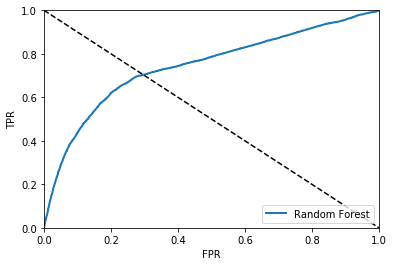

In [130]:
plt.show()

In [139]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogR, param_grid)
clf.estimator

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
X_validation3.head()

,age,euribor3m,job,campaign,education,day_of_week,marital,housing,loan
15500,7,0.980050,2,0,3,4,1,0,1
29034,10,0.174790,2,0,1,4,1,0,1
11199,7,0.980957,2,0,3,3,1,1,1
22247,11,0.981410,8,0,3,3,1,0,1
27180,9,0.767853,2,0,3,4,1,0,1


In [142]:
X_train4= X_train3.drop(9,axis=1).copy()
X_validation4 = X_validation3.drop('loan',axis=1).copy()

Confusion Matrix :
[[5262 2057]
 [ 275  644]]

F1 Score :
0.355801104972

Area Under Curve : 
0.70985618691

precision score : 
0.238430211033

recall score : 
0.700761697497

ROC : 


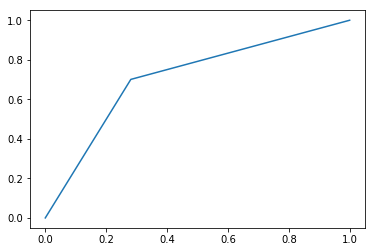

In [143]:
LogR = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogR.fit(X=X_train4,y=y_train)
y_LogR = LogR.predict(X_validation4)
fpr,tpr = algo_performace(y_validation,y_LogR)

In [144]:
X_validation4.columns

Index([u'age', u'euribor3m', u'job', u'campaign', u'education', u'day_of_week',
       u'marital', u'housing'],
      dtype='object')

Confusion Matrix :
[[5262 2057]
 [ 275  644]]

F1 Score :
0.355801104972

Area Under Curve : 
0.70985618691

precision score : 
0.238430211033

recall score : 
0.700761697497

ROC : 


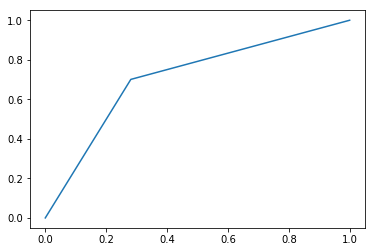

In [146]:
X_train5= X_train4.drop(4,axis=1).copy()
X_validation5 = X_validation4.drop('education',axis=1).copy()
LogR = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogR.fit(X=X_train5,y=y_train)
y_LogR = LogR.predict(X_validation5)
fpr,tpr = algo_performace(y_validation,y_LogR)